In [24]:
# https://cosmiccoding.com.au/tutorials/ab_tests

import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.proportion as prop
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import math
import statistics



Control conversion rate:  0.021
Treatment conversion rate:  0.023


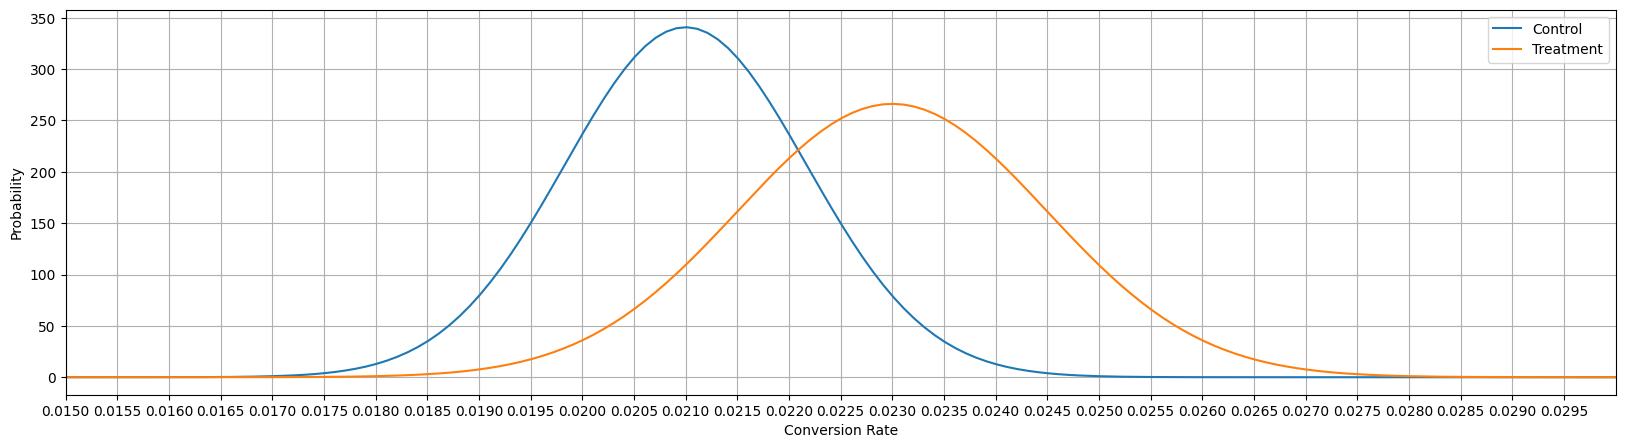

In [46]:
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(20,5))
sample_a, sample_b = 15000, 10000
conv_a, conv_b = 315, 230
rate_a, rate_b = conv_a/sample_a, conv_b/sample_b
print("Control conversion rate: ", rate_a)
print("Treatment conversion rate: ",rate_b)

#given data we collected, the probability that the TRUE conversion rate for A and B was a certain value
std_a = np.sqrt(rate_a * (1-rate_a) / sample_a)
std_b = np.sqrt(rate_b * (1-rate_b) / sample_b)

conv_rate = np.linspace(0,.2, 2000)
prob_a = norm(rate_a, std_a).pdf(conv_rate)
prob_b = norm(rate_b, std_b).pdf(conv_rate)

plt.plot(conv_rate, prob_a, label = "Control")
plt.plot(conv_rate, prob_b, label = "Treatment")
plt.xticks(np.arange(0.015,.03,step=.0005))
plt.xlim(0.015,.03)
plt.legend()
plt.grid()
plt.xlabel("Conversion Rate"); plt.ylabel("Probability");

In [26]:
z_score = (rate_b - rate_a)/np.sqrt(std_a**2 + std_b**2)
print("z-score is:")
print("{0:0.3f}".format(z_score))

#is treatment better than control?
print('p-value for 1-tail test is:')
print('{0:0.3f}'.format(norm().sf(z_score)))

#is treatment different from control?
print('p-value for 2-tail test is:')
print('{0:0.3f}'.format(norm().sf(z_score)*2))

z-score is:
1.052
p-value for 1-tail test is:
0.147
p-value for 2-tail test is:
0.293


In [49]:
(lower_a, lower_b), (upper_a, upper_b) = proportion_confint(successes, nobs=nobs, alpha=0.025)
print(f'ci 95% for control group: [{lower_a:.4f}, {upper_a:.4f}]')
print(f'ci 95% for treatment group: [{lower_b:.4f}, {upper_b:.4f}]')

ci 95% for control group: [0.0184, 0.0236]
ci 95% for treatment group: [0.0196, 0.0264]


In [30]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
successes = [conv_a, conv_b]
nobs = [sample_a, sample_b]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_a, lower_b), (upper_a, upper_b) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_a:.4f}, {upper_a:.4f}]')
print(f'ci 95% for treatment group: [{lower_b:.4f}, {upper_b:.4f}]')

z statistic: -1.06
p-value: 0.289
ci 95% for control group: [0.0187, 0.0233]
ci 95% for treatment group: [0.0201, 0.0259]


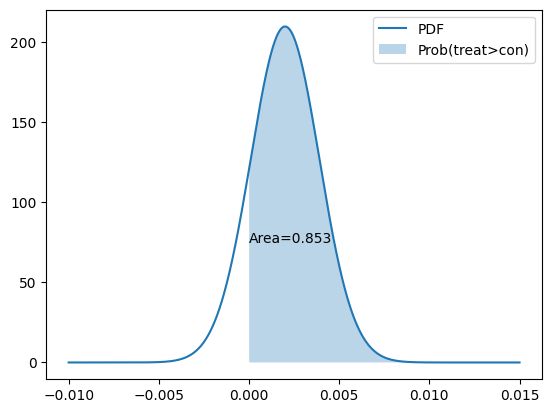

In [27]:
#plot
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))
x = np.linspace(-.01,0.015,1000)
y = p.pdf(x)
#get 1 - p-value for 1-tail test, probability treatment is better than control
area_under_curve = p.sf(0)
plt.plot(x,y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(treat>con)", alpha = 0.3)
plt.annotate(f"Area={area_under_curve:0.3f}",(0,75))
plt.legend()


In [77]:
#condensed code
#norm.cdf will return confidence value
#norm.sf will return p-value for 1 tail test

def get_confidence_ab_test(conv_a, sample_a, conv_b, sample_b):
    rate_a = conv_a / sample_a
    rate_b = conv_b / sample_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / sample_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / sample_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.sf(z_score)

print(get_confidence_ab_test(conv_a, sample_a, conv_b, sample_b))

0.14651203530590012


In [78]:
#simulation check
n = 10000
rates_a = norm(rate_a, std_a).rvs(n)
rates_b = norm(rate_b, std_b).rvs(n)
b_better = (rates_b > rates_a).mean()
print(f"B is better than A {b_better:0.1%} of the time in the simulation data")

B is better than A 84.7% of the time


Control conversion rate:  0.2
Treatment conversion rate:  0.16363636363636364


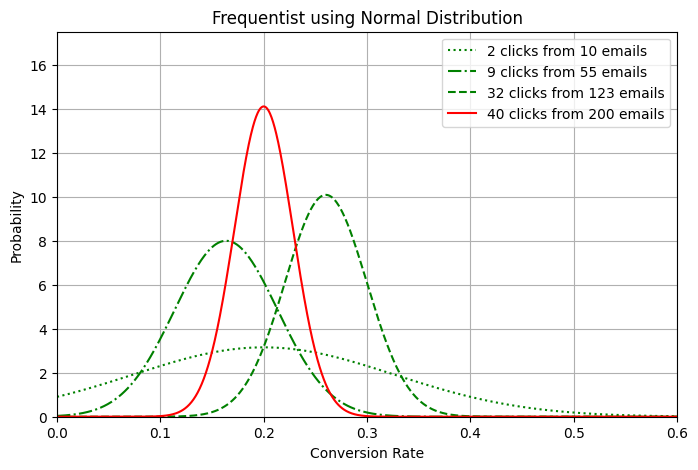

In [20]:
from scipy.stats import norm
sample_a, sample_b, sample_c, sample_d = 10,55,123,200
conv_a, conv_b,conv_c,conv_d = 2,9,32,40
rate_a, rate_b, rate_c, rate_d = conv_a/sample_a, conv_b/sample_b,conv_c/sample_c,conv_d/sample_d
print("Control conversion rate: ", rate_a)
print("Treatment conversion rate: ",rate_b)

#given data we collected, the probability that the TRUE conversion rate for A and B was a certain value
std_a = np.sqrt(rate_a * (1-rate_a) / sample_a)
std_b = np.sqrt(rate_b * (1-rate_b) / sample_b)
std_c = np.sqrt(rate_c * (1-rate_c) / sample_c)
std_d = np.sqrt(rate_d * (1-rate_d) / sample_d)

conv_rate = np.linspace(0,1, 2000)
prob_a = norm(rate_a, std_a).pdf(conv_rate)
prob_b = norm(rate_b, std_b).pdf(conv_rate)
prob_c = norm(rate_c, std_c).pdf(conv_rate)
prob_d = norm(rate_d, std_d).pdf(conv_rate)

plt.figure(figsize=(8,5))
plt.plot(conv_rate, prob_a, 'g:', label = "2 clicks from 10 emails")
plt.plot(conv_rate, prob_b, 'g-.', label = "9 clicks from 55 emails")
plt.plot(conv_rate, prob_c, 'g--', label = "32 clicks from 123 emails")
plt.plot(conv_rate, prob_d, 'r-', label = "40 clicks from 200 emails")
plt.xlim(0.,0.6)
plt.ylim(0,17.5)
plt.legend()
plt.grid()
plt.title("Frequentist using Normal Distribution")
plt.xlabel("Conversion Rate"); plt.ylabel("Probability");

Control conversion rate:  0.2
Treatment conversion rate:  0.16363636363636364


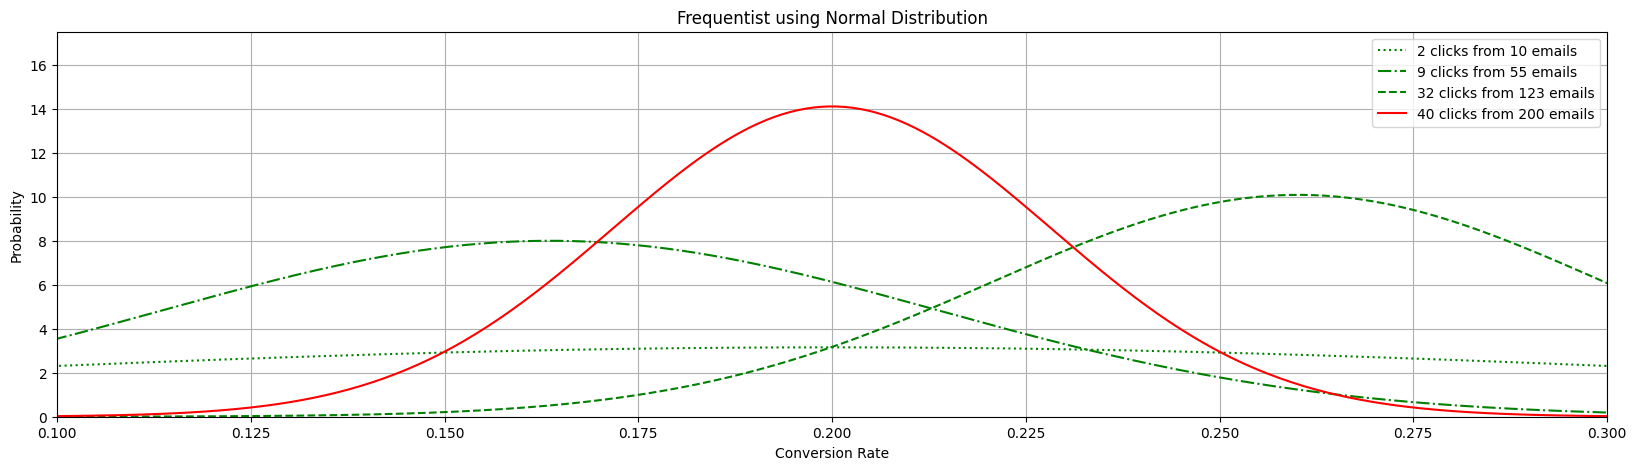

In [23]:
from scipy.stats import norm
sample_a, sample_b, sample_c, sample_d = 10,55,123,200
conv_a, conv_b,conv_c,conv_d = 2,9,32,40
rate_a, rate_b, rate_c, rate_d = conv_a/sample_a, conv_b/sample_b,conv_c/sample_c,conv_d/sample_d
print("Control conversion rate: ", rate_a)
print("Treatment conversion rate: ",rate_b)

#given data we collected, the probability that the TRUE conversion rate for A and B was a certain value
std_a = np.sqrt(rate_a * (1-rate_a) / sample_a)
std_b = np.sqrt(rate_b * (1-rate_b) / sample_b)
std_c = np.sqrt(rate_c * (1-rate_c) / sample_c)
std_d = np.sqrt(rate_d * (1-rate_d) / sample_d)

conv_rate = np.linspace(0,1, 2000)
prob_a = norm(rate_a, std_a).pdf(conv_rate)
prob_b = norm(rate_b, std_b).pdf(conv_rate)
prob_c = norm(rate_c, std_c).pdf(conv_rate)
prob_d = norm(rate_d, std_d).pdf(conv_rate)

plt.figure(figsize=(20,5))
plt.plot(conv_rate, prob_a, 'g:', label = "2 clicks from 10 emails")
plt.plot(conv_rate, prob_b, 'g-.', label = "9 clicks from 55 emails")
plt.plot(conv_rate, prob_c, 'g--', label = "32 clicks from 123 emails")
plt.plot(conv_rate, prob_d, 'r-', label = "40 clicks from 200 emails")
plt.xlim(0.1,0.3)
plt.ylim(0,17.5)
plt.legend()
plt.grid()
plt.title("Frequentist using Normal Distribution")
plt.xlabel("Conversion Rate"); plt.ylabel("Probability");